<a href="https://colab.research.google.com/github/utsha95/Deeplearning-t-o/blob/main/Deeplearning_t.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [141]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import accuracy_score, classification_report  # Import accuracy_score and classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import label_binarize
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

In [142]:
# Mount with google drive
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [143]:
# Load datasets
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Student_Data (1).csv')

In [144]:
# Preprocess data
# Encode categorical variables if any
le = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns: # Change 'data' to 'df'
    df[column] = le.fit_transform(df[column]) # Change 'data' to 'df'

In [145]:
# Check column names
print(df.columns)


Index(['Academic \nachievement \nof mother',
       'Academic \nachievement \nof father ', 'Father's job', 'Mother's job',
       'Parents \ncondition', 'Study \nsession \n[Hour]',
       'Health \nstatus \n[Physical]', 'Health \nstatus \n[Spritual]',
       'Health \nstatus \nEmotional]', 'Health \nstatus \n[Social]',
       'Most used \napps \n[Facebook]', 'Most used \napps \n[Instagram]',
       'Most used \napps\n [Tiktok]', 'Most used \napps \n[Whatsapp]',
       'Most used \napps\n [Messenger]', 'Most used\n apps \n[Telegram]',
       'Daily facebook \nbrowsing \ntime \n[Hour]', 'Physical \nactivity',
       'Extra \nCurricular \ninvolvement\n [Sports]',
       'Extra \nCurricular \ninvolvement \n[Arts]',
       'Extra \nCurricular \ninvolvement \n[Clubs]',
       'Extra \nCurricular \ninvolvement \n[Volunteer]',
       'Extra \nCurricular \ninvolvement \n[Leadership position]',
       'Career \nfocus/Passion',
       'Undergraduate \nand graduate \nStudent's \nrelationship\n sta

In [146]:
# Replace 'Career \nfocus/Passion' with the exact name of your target column
X = df.drop('Career \nfocus/Passion', axis=1)
y = df['Career \nfocus/Passion']

In [147]:
# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [148]:
# Convert target variable to categorical (for multi-class classification)
y = to_categorical(y)

In [149]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [150]:
# Build the neural network model
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(y.shape[1], activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [151]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [152]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.1676 - loss: 2.0253 - val_accuracy: 0.1111 - val_loss: 1.7822
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.1715 - loss: 1.9207 - val_accuracy: 0.1389 - val_loss: 1.6885
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2624 - loss: 1.7312 - val_accuracy: 0.1944 - val_loss: 1.6121
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2317 - loss: 1.7067 - val_accuracy: 0.2222 - val_loss: 1.5481
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2337 - loss: 1.6311 - val_accuracy: 0.3056 - val_loss: 1.4910
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3270 - loss: 1.5460 - val_accuracy: 0.3056 - val_loss: 1.4465
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3976 - loss: 1.4508 - val_accuracy: 0.3333 - val_loss: 1.4055
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4305 - loss: 1.3813 - val_accuracy: 0.5833 - val_loss: 1.3683


In [153]:
# Predict on test set
y_pred = model.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=1)
y_test_class = np.argmax(y_test, axis=1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [154]:
import numpy as np
from sklearn.metrics import confusion_matrix
# Ensure y_pred is available from model.predict(X_test) and y_test from train_test_split.
y_pred_class = np.argmax(y_pred, axis=1)
y_test_class = np.argmax(y_test, axis=1)

In [155]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test_class, y_pred_class)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[12  0  5  1  0]
 [ 0 13  4  4  0]
 [ 0  0 10  2  0]
 [ 0  2  0 22  0]
 [ 0  0  0  0  2]]


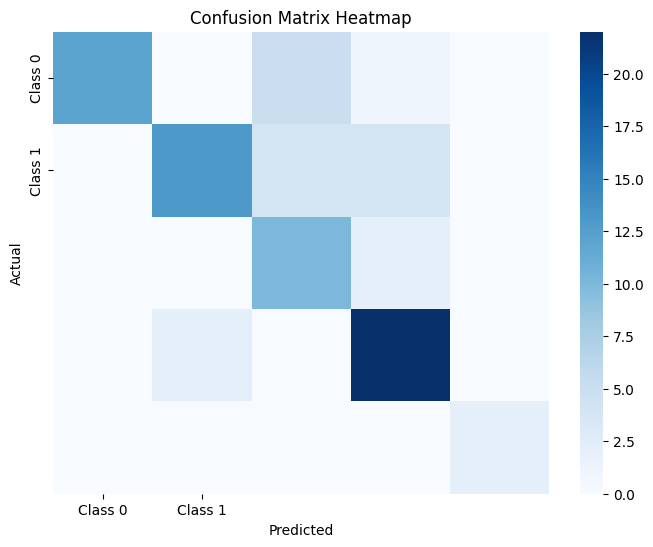

In [156]:
# Heatmap of Confusion Matrix without displaying values
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=False, cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

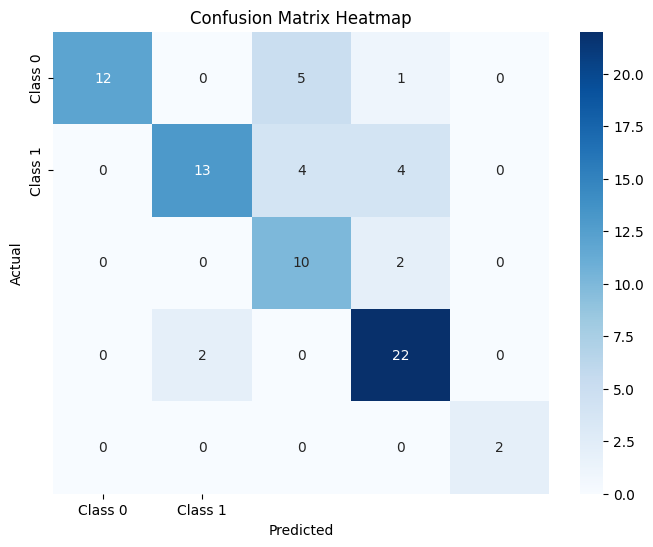

In [157]:
# Heatmap of Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [158]:
# Assuming y_test has multiple classes, e.g., 0, 1, 2, 3, 4
# y_test is likely one-hot encoded or contains probabilities
# We need to get the class labels from the original data (before one-hot encoding)
# Assuming original labels are 0, 1, 2, 3, 4
# If you have the original labels in a variable, use that instead of np.arange
y_test_original_labels = np.argmax(y_test, axis=1)  # Get original labels from one-hot encoded data
classes = np.unique(y_test_original_labels) # Or replace with your original labels: classes = [0, 1, 2, 3, 4]

In [159]:
# Convert y_test to binary format using the correct classes
y_test_bin = label_binarize(y_test_original_labels, classes=classes)
n_classes = y_test_bin.shape[1]

In [160]:
# Make sure you have obtained predicted probabilities from your model
# Assuming your model is called 'model' and you are predicting on 'X_test'
y_pred_proba = model.predict(X_test) # Use predict instead of predict_proba

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [161]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    # Use y_pred_proba directly for binary classification or adapt for multi-class
    # If y_pred_proba has probabilities for a single class:
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])  # Sliced for multi-class
    # If y_pred_proba needs to be sliced for multi-class (ensure correct slicing):
    # fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])  # Adjust slicing if needed

    roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()
    plt


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

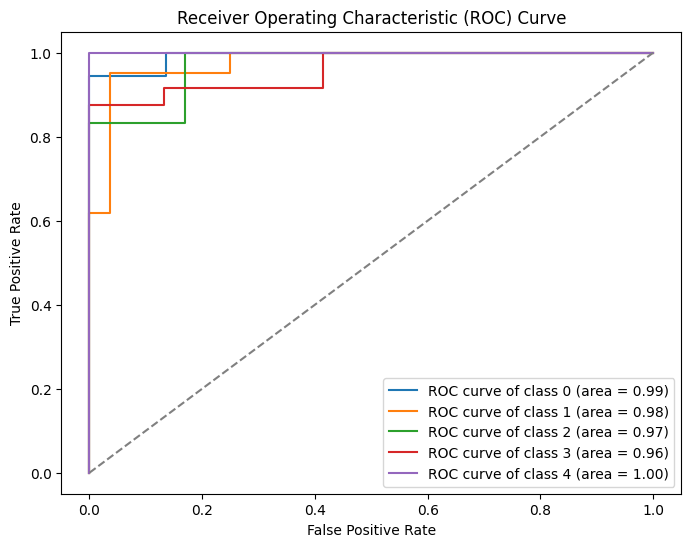

In [162]:
# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


In [163]:
# Assuming y_pred_proba is the output of your model with shape (77, 5)
# Convert y_pred_proba to a binary format based on a threshold (e.g., 0.5)
y_pred_bin = (y_pred_proba >= 0.5).astype(int)


In [164]:
# Now We can use y_pred_bin for accuracy calculation
accuracy = accuracy_score(y_test_bin, y_pred_bin)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test_bin, y_pred_bin))

Accuracy: 71.43%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.56      0.71        18
           1       1.00      0.57      0.73        21
           2       1.00      0.75      0.86        12
           3       0.76      0.92      0.83        24
           4       1.00      1.00      1.00         2

   micro avg       0.89      0.71      0.79        77
   macro avg       0.95      0.76      0.83        77
weighted avg       0.92      0.71      0.78        77
 samples avg       0.71      0.71      0.71        77



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [165]:
# Cross-validation for standard deviation of accuracy
kf = KFold(n_splits=10, shuffle=True, random_state=42)
accuracy_scores = []
for train_index, test_index in kf.split(X):
    X_train_fold, X_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

In [166]:
# Cross-validation for standard deviation of accuracy
kf = KFold(n_splits=10, shuffle=True, random_state=42)
accuracy_scores = []
for train_index, test_index in kf.split(X):
    X_train_fold, X_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    # Train the model on each fold - This line was incorrectly indented
    model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, verbose=0)
    scores = model.evaluate(X_test_fold, y_test_fold, verbose=0)
    accuracy_scores.append(scores[1])  # Index 1 for accuracy

print("Standard Deviation of Cross-Validated Accuracy Scores:", np.std(accuracy_scores))

Standard Deviation of Cross-Validated Accuracy Scores: 0.030224408422078256


In [167]:
# Assuming your data is in a pandas DataFrame called 'df':
correlation_matrix = df.corr()  # Calculate the correlation matrix

<Axes: >

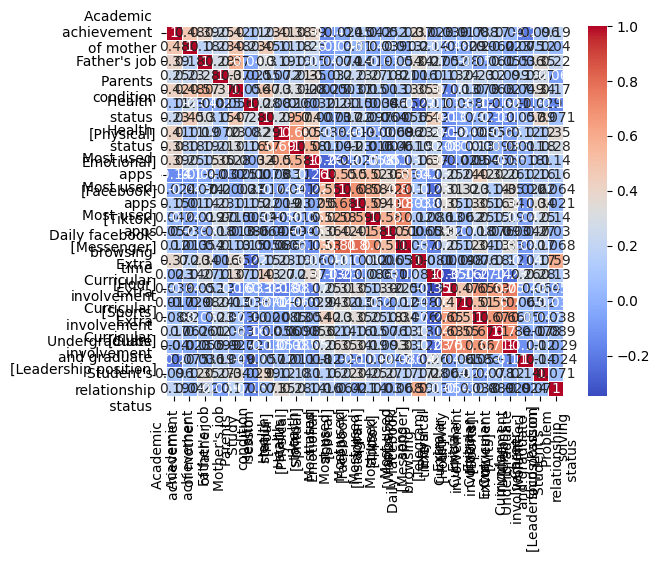

In [168]:
# Now we can draw the heatmap:
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

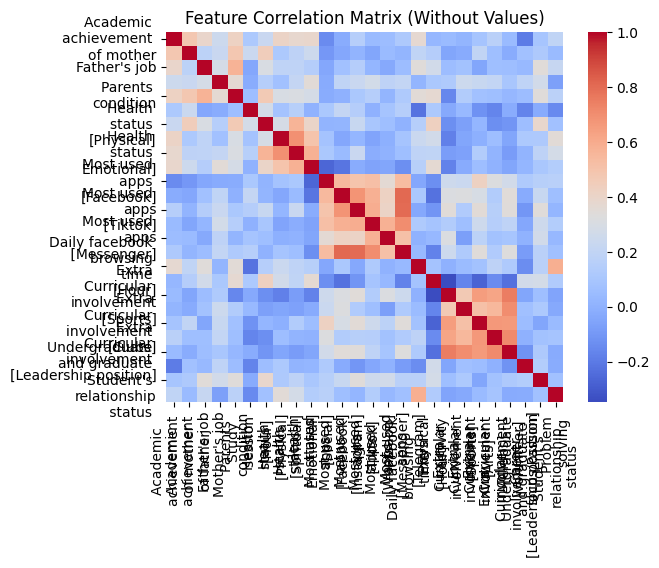

In [169]:
# Now we can draw the heatmap:
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title('Feature Correlation Matrix (Without Values)')
plt.show()